# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from citipy import citipy
# https://pypi.org/project/citipy/ (pip install citipy)

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

577

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#OpenWeather Key
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=8b12adb4095f65c801ada39635129624&units=imperial&q=


In [5]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | longyearbyen
City not found. Skipping...
Processing Record 4 of Set 1 | cape town
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | daru
City not found. Skipping...
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | buala
Processing Record 13 of Set 1 | pouebo
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | aksu
Processing Record 17 of Set 1 | northam
Processing Record 18 of Set 1 | cusco
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | karema
Processing Record 21 of Set 1 | poum
City not found. Skipping...
Processing Record 22 of Set 1 | sask

Processing Record 41 of Set 4 | guaruja
City not found. Skipping...
Processing Record 42 of Set 4 | doka
Processing Record 43 of Set 4 | doha
Processing Record 44 of Set 4 | san ramon
Processing Record 45 of Set 4 | mahebourg
Processing Record 46 of Set 4 | tabriz
Processing Record 47 of Set 4 | calabar
Processing Record 48 of Set 4 | fairbanks
Processing Record 49 of Set 4 | fukuma
Processing Record 1 of Set 5 | kargasok
Processing Record 2 of Set 5 | sao felix do xingu
Processing Record 3 of Set 5 | vardo
Processing Record 4 of Set 5 | codrington
Processing Record 5 of Set 5 | tuktoyaktuk
City not found. Skipping...
Processing Record 6 of Set 5 | port blair
Processing Record 7 of Set 5 | gamba
Processing Record 8 of Set 5 | wanning
Processing Record 9 of Set 5 | lerwick
Processing Record 10 of Set 5 | guilin
Processing Record 11 of Set 5 | bathsheba
Processing Record 12 of Set 5 | pucallpa
Processing Record 13 of Set 5 | lompoc
Processing Record 14 of Set 5 | san patricio
Processing 

Processing Record 32 of Set 8 | zaoyang
Processing Record 33 of Set 8 | kenai
Processing Record 34 of Set 8 | mabaruma
Processing Record 35 of Set 8 | zlitan
Processing Record 36 of Set 8 | tura
Processing Record 37 of Set 8 | sungaipenuh
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 38 of Set 8 | rawson
Processing Record 39 of Set 8 | weinan
Processing Record 40 of Set 8 | moen
Processing Record 41 of Set 8 | rantepao
Processing Record 42 of Set 8 | smithers
Processing Record 43 of Set 8 | huarmey
Processing Record 44 of Set 8 | moose factory
Processing Record 45 of Set 8 | nichinan
Processing Record 46 of Set 8 | celestun
City not found. Skipping...
Processing Record 47 of Set 8 | asosa
Processing Record 48 of Set 8 | denpasar
City not found. Skipping...
Processing Record 49 of Set 8 | mount isa
Processing Record 1 of Set 9 | plainview
Processing Record 2 of Set 9 | deputatskiy
City not found. Skipping...
Processing Record 3 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

In [7]:
weather_dataframe = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_dataframe.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,90,AR,1578933632,87,-54.80,-68.30,55.40,2.62
1,mataura,0,NZ,1578933633,91,-46.19,168.86,41.00,1.01
2,longyearbyen,20,SJ,1578933634,76,78.22,15.64,-5.80,3.36
3,cape town,0,CL,1578933634,56,-36.41,-71.90,73.40,4.70
4,hilo,90,US,1578933635,51,19.73,-155.09,86.00,10.29
5,jamestown,90,US,1578933635,93,42.10,-79.24,46.00,5.82
6,punta arenas,99,PH,1578933635,88,8.99,125.34,74.88,0.36
7,rikitea,17,PF,1578933636,79,-23.12,-134.97,77.54,11.79
8,daru,59,PG,1578933636,95,-9.08,143.21,73.27,7.07
9,avarua,84,CK,1578933636,88,-21.21,-159.78,77.00,9.17


In [8]:
# Exporting to CSV

weather_dataframe.to_csv("weather_df.csv")

In [13]:
# Checking New DataFrame & Cleaning the Data

weather_data = pd.read_csv("weather_df.csv")
weather_df2 = weather_data.drop(columns=["Unnamed: 0"])
weather_df2.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,90,AR,1578933632,87,-54.80,-68.30,55.40,2.62
1,mataura,0,NZ,1578933633,91,-46.19,168.86,41.00,1.01
2,longyearbyen,20,SJ,1578933634,76,78.22,15.64,-5.80,3.36
3,cape town,0,CL,1578933634,56,-36.41,-71.90,73.40,4.70
4,hilo,90,US,1578933635,51,19.73,-155.09,86.00,10.29
5,jamestown,90,US,1578933635,93,42.10,-79.24,46.00,5.82
6,punta arenas,99,PH,1578933635,88,8.99,125.34,74.88,0.36
7,rikitea,17,PF,1578933636,79,-23.12,-134.97,77.54,11.79
8,daru,59,PG,1578933636,95,-9.08,143.21,73.27,7.07
9,avarua,84,CK,1578933636,88,-21.21,-159.78,77.00,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

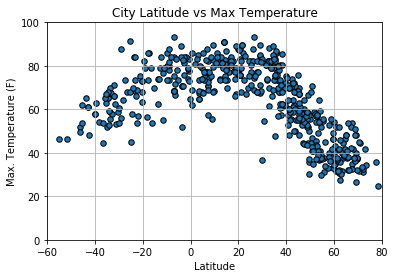

In [22]:
#Create a Scatter Plot for Lattitude vs Temperature of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS TEMP.png")

#### Latitude vs. Humidity Plot

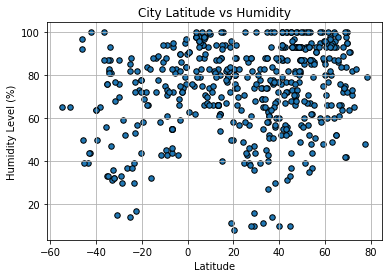

In [9]:
#create a Scatter Plot for Lattitude vs Humidity
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS HUM.png')

#### Latitude vs. Cloudiness Plot

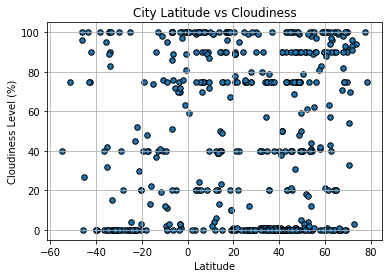

In [10]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS CLOUD.png')

#### Latitude vs. Wind Speed Plot

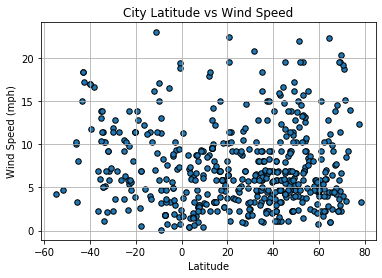

In [11]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS WIND.png')

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots


In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]>0.01]
southern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]<-0.01]

# northern_hemisphere.head()
southern_hemisphere.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,samarai,76,PG,1569638590,86,-10.62,150.67,78.84,9.01
2,port elizabeth,100,CD,1569638590,55,-7.04,29.76,68.58,1.81
6,namatanai,75,PG,1569638591,69,-3.66,152.44,83.52,8.66
12,redcliffe,0,AU,1569638592,68,-31.94,115.94,71.01,6.93
13,port hardy,100,CD,1569638592,55,-7.04,29.76,68.58,1.81


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

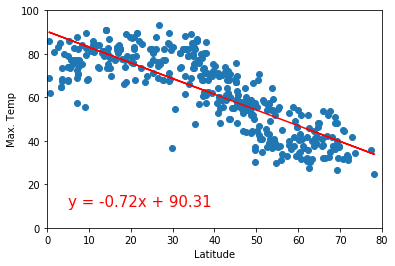

In [14]:
#Create a Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH MAX TEMP VS LAT.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

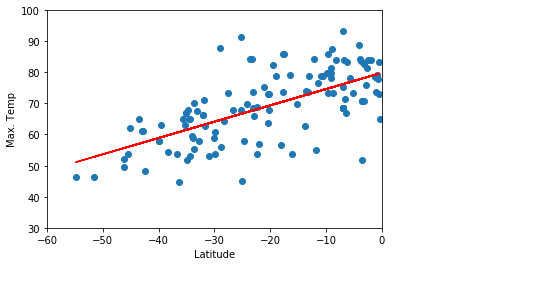

In [15]:
#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH MAX TEMP VS LAT.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

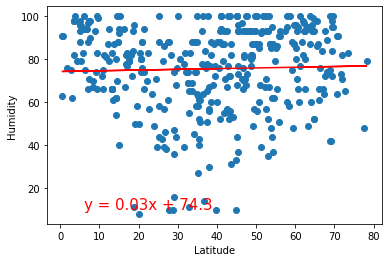

In [16]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH HUM VS LAT.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

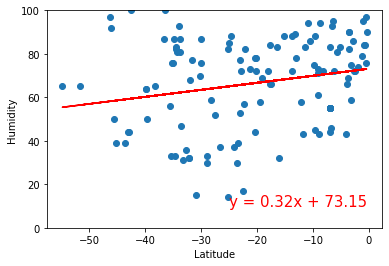

In [17]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH HUM VS LAT.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

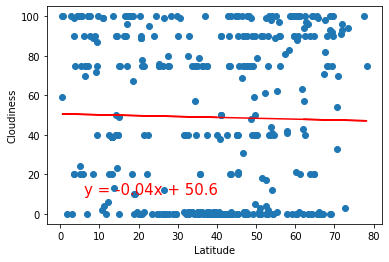

In [18]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH CLOUD VS LAT.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

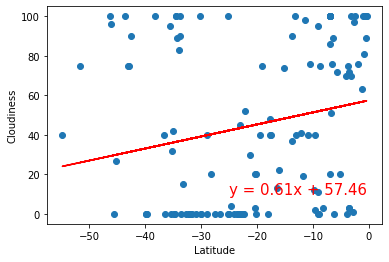

In [19]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH CLOUD VS LAT.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

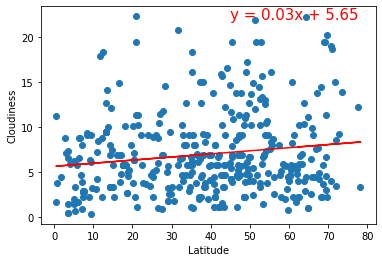

In [20]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH WIND VS LAT.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

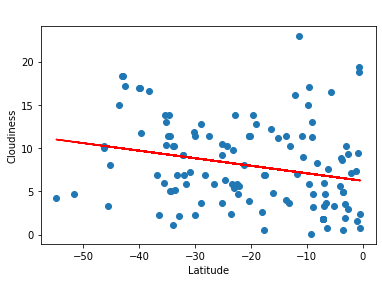

In [21]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH WIND VS LAT.png")